In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
plt.style.use('ggplot')
from PIL import features

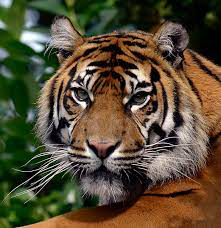

In [22]:
imgData = image.load_img('image/tiger/tiger1.jpg')
imgData

In [23]:
type(imgData)

PIL.JpegImagePlugin.JpegImageFile

In [24]:
dataGen = image.ImageDataGenerator(rescale=1./255 )

In [25]:
trainGen= dataGen.flow_from_directory('image',target_size=(98,98),
                                      batch_size=100)

Found 37 images belonging to 2 classes.


In [26]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

In [27]:
print (features.check_module('webp'))

False


In [28]:

x_train,y_train = trainGen.next()

In [29]:
x_train.shape , y_train.shape

((37, 98, 98, 3), (37, 2))

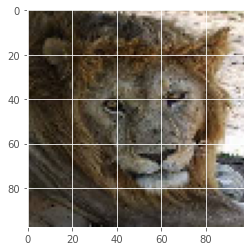

In [30]:
plt.imshow(x_train[0])

In [31]:
# 분류값 확인
trainGen.class_indices

{'lion': 0, 'tiger': 1}

In [32]:
# flatten 쓰면 인코딩 안해도됨. 3차원 데이터
model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=2,  activation='softmax' )  )

# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 15ms/step - loss: 0.7048 - acc: 0.5135
Epoch 2/50
2/2 [==============================] - 0s 13ms/step - loss: 4.6037 - acc: 0.4595
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 0.5026 - acc: 0.7297
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2789 - acc: 0.8919
Epoch 5/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1833 - acc: 0.9459
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1135 - acc: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0650 - acc: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0492 - acc: 1.0000
Epoch 9/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - acc: 1.0000
Epoch 10/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0679 - acc: 0.9730
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0774 - a

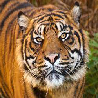

In [33]:
testImg = image.load_img('image/test.jpg',target_size=(98,98))
testImg

In [34]:
imgArr = image.img_to_array(testImg) #  넘파이 배열로 만듦
imgArr = imgArr/255   #  스케일링

In [35]:
imgArr.shape

(98, 98, 3)

In [36]:
model.predict(imgArr.reshape(1,98,98,3)).argmax(axis=1)

array([0], dtype=int64)

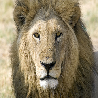

In [37]:
testImg2 = image.load_img('image/test2.jpg',target_size=(98,98))
testImg2

In [38]:
imgArr2 = image.img_to_array(testImg2) #  넘파이 배열로 만듦
imgArr2 = imgArr2/255   #  스케일링

In [39]:
imgArr2.shape

(98, 98, 3)

In [40]:
model.predict(imgArr2.reshape(1,98,98,3)).argmax(axis=1)

array([0], dtype=int64)